In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics, svm, linear_model, model_selection, naive_bayes
from matplotlib import pyplot as plt

In [4]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=66)

In [11]:
# 模型评估的第一个指标：布里尔分数
# 布里尔分数
gnb = naive_bayes.GaussianNB().fit(X_train, y_train)
bayes_prob = gnb.predict_proba(X_test)
metrics.brier_score_loss(y_test, bayes_prob[:, 1], pos_label=1)


0.03947531290953006

In [10]:
# 建立模型 查看对应模型上的布里尔分数
lr = linear_model.LogisticRegression(solver='lbfgs', max_iter=3000, multi_class='auto').fit(X_train, y_train)
lr_prob = lr.predict_proba(X_test)
# 查看布里尔分数介于0到1，分数越高则表示预测结果越差劲，校准程度越差，因此布里尔分数越接近0越好
metrics.brier_score_loss(y_test, lr_prob[:, 1], pos_label=1)



0.010792328135514237

In [7]:
# svm模型和其布里尔分数
svc = svm.SVC(C=1.0, kernel='linear').fit(X_train, y_train)
# 因为svc中没有predict_proba方法，我采取的方法是使用其置信度，并把它归一化，压缩到0~1之间
svc_prob = svc.decision_function(X_test)
svc_prob = (svc_prob - svc_prob.min()) / (svc_prob.max() - svc_prob.min())
metrics.brier_score_loss(y_test, svc_prob[:, 1], pos_label=1)

0.24443698520876303

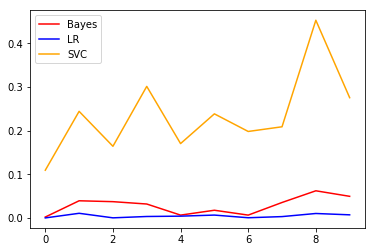

In [15]:
# 
names = ['Bayes', 'LR', 'SVC']
colors = ['red', 'blue', 'orange']
df = pd.DataFrame(index=range(10), columns=names)
for i in range(10):
    df.loc[i, names[0]] = metrics.brier_score_loss(y_test, bayes_prob[:, i], pos_label=i)
    df.loc[i, names[1]] = metrics.brier_score_loss(y_test, lr_prob[:, i], pos_label=i)
    df.loc[i, names[2]] = metrics.brier_score_loss(y_test, svc_prob[:, i], pos_label=i)
for index, color in enumerate(colors):
    plt.plot(range(10), df.iloc[:, index], color=color, label=names[index])
plt.legend()
plt.show()


In [16]:
# 模型评估的第一个指标：对数似然损失
# 对数似然损失的取值越小越好，越小则证明概率估计越准确，模型越理想
# 高斯朴素贝叶斯下的对数似然损失
metrics.log_loss(y_test, bayes_prob)

2.984764133956067

In [17]:
# 逻辑回归下的对数似然损失
metrics.log_loss(y_test, lr_prob)

0.14919129929019223

In [18]:
# svc下的对数似然损失
metrics.log_loss(y_test, svc_prob)

1.6277156300220184